In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_NW_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130.0,322.0,0.0,2.0,109.0,0,2.4,2.0,3,3.0
1,0.0,67.0,3.0,115.0,564.0,0.0,2.0,160.0,0,1.6,2.0,0,7.0
2,1.0,57.0,2.0,124.0,261.0,0.0,0.0,141.0,0,0.3,1.0,0,7.0
3,1.0,64.0,4.0,128.0,263.0,0.0,0.0,105.0,1,0.2,2.0,1,7.0
4,0.0,74.0,2.0,120.0,269.0,0.0,2.0,121.0,1,0.2,1.0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,172.0,199.0,1.0,0.0,162.0,0,NaN,1.0,0,7.0
266,1.0,44.0,2.0,120.0,263.0,0.0,0.0,173.0,0,0.0,1.0,0,7.0
267,0.0,56.0,2.0,140.0,294.0,0.0,2.0,153.0,0,1.3,2.0,0,3.0
268,1.0,57.0,4.0,140.0,192.0,0.0,0.0,148.0,0,0.4,2.0,0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	1
float64		column 2	1
float64		column 3	1
float64		column 4	3
float64		column 5	2
float64		column 6	4
float64		column 7	3
float64		column 8	4
int64		column 9	0
float64		column 10	2
float64		column 11	1
int64		column 12	0
float64		column 13	2


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,269.000000,269.000000,269.000000,267.000000,268.000000,266.000000,267.000000,266.000000,270.000000,268.000000,269.000000,270.000000,268.000000
mean,0.680297,54.386617,3.182156,131.209738,249.981343,0.150376,1.018727,149.654135,0.329630,1.055970,1.579926,0.670370,4.708955
std,0.467231,9.093583,0.942516,17.782971,51.741612,0.358113,0.997942,23.165213,0.470952,1.147184,0.609415,0.943896,1.942332
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,213.750000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,281.250000,0.000000,2.000000,165.750000,1.000000,1.650000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

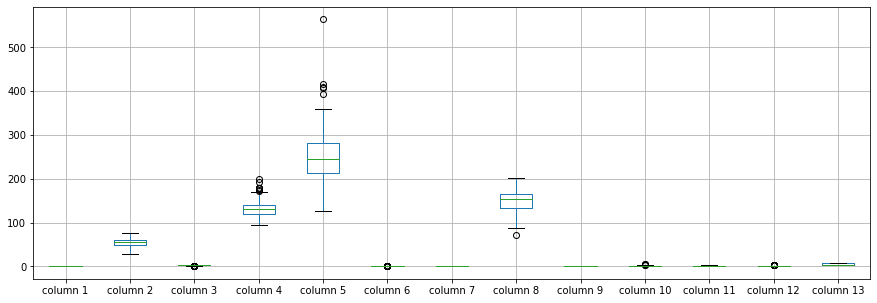

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.680297
column 2      54.386617
column 3       3.182156
column 4     131.209738
column 5     249.981343
column 6       0.150376
column 7       1.018727
column 8     149.654135
column 9       0.329630
column 10      1.055970
column 11      1.579926
column 12      0.670370
column 13      4.708955
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.093150,0.040064,-0.065785,-0.215763,0.041331,0.042709,-0.081597,0.189165,0.103440,0.077673,0.083399,0.388858
column 2,-0.093150,1.000000,0.082346,0.278409,0.223373,0.120840,0.129867,-0.399353,0.102357,0.192705,0.165675,0.351378,0.111620
column 3,0.040064,0.082346,1.000000,-0.047962,0.092496,-0.104967,0.077854,-0.318713,0.350947,0.170261,0.124202,0.241170,0.258691
column 4,-0.065785,0.278409,-0.047962,1.000000,0.171526,0.158318,0.111887,-0.030321,0.068321,0.215966,0.096136,0.090223,0.123188
column 5,-0.215763,0.223373,0.092496,0.171526,1.000000,0.023696,0.161245,-0.008995,0.074198,0.024917,-0.018324,0.132493,0.034510
column 6,0.041331,0.120840,-0.104967,0.158318,0.023696,1.000000,0.055699,0.040728,-0.008547,-0.025167,0.023338,0.119926,0.054661
column 7,0.042709,0.129867,0.077854,0.111887,0.161245,0.055699,1.000000,-0.066834,0.099246,0.122309,0.146634,0.117852,0.017420
column 8,-0.081597,-0.399353,-0.318713,-0.030321,-0.008995,0.040728,-0.066834,1.000000,-0.384291,-0.350031,-0.387372,-0.264911,-0.245779
column 9,0.189165,0.102357,0.350947,0.068321,0.074198,-0.008547,0.099246,-0.384291,1.000000,0.280162,0.247060,0.153347,0.326279
column 10,0.103440,0.192705,0.170261,0.215966,0.024917,-0.025167,0.122309,-0.350031,0.280162,1.000000,0.599224,0.252272,0.328935


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [10]:
imputer = md.Midas(layer_structure = [13,13+101,13+101+101,13+101+101+101,13+101+101+101+101,13+101+101+101+101+101,13+101+101+101+101,13+101+101+101,13+101+101,13+101,13], vae_layer = False, seed = 101)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 604.5118942260742
Epoch: 1 , loss: 604.9289703369141
Epoch: 2 , loss: 603.28125
Epoch: 3 , loss: 604.8147583007812
Epoch: 4 , loss: 604.8245849609375
Epoch: 5 , loss: 603.6423187255859
Epoch: 6 , loss: 603.0247611999512
Epoch: 7 , loss: 602.5316009521484
Epoch: 8 , loss: 604.312801361084
Epoch: 9 , loss: 604.1063003540039
Epoch: 10 , loss: 602.362720489502
Epoch: 11 , loss: 600.2350578308105
Epoch: 12 , loss: 599.1503715515137
Epoch: 13 , loss: 597.0164070129395
Epoch: 14 , loss: 596.9299392700195
Epoch: 15 , loss: 596.687385559082
Epoch: 16 , loss: 594.5261650085449
Epoch: 17 , loss: 593.832275390625
Epoch: 18 , loss: 591.0850830078125
Epoch: 19 , loss: 591.1662750244141
Epoch: 20 , loss: 589.6313400268555
Epoch: 21 , loss: 587.8814315795898
Epoch: 22 , loss: 584.8892860412598
Epoch: 23 , loss: 573.7437324523926
Epoch: 24 , loss: 546.9855785369873
Epoch: 25 , loss: 506.51728439331055
Epoch: 26 , loss:

In [11]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [12]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.0
column 2      48.0
column 3       2.0
column 4     130.0
column 5     245.0
column 6       0.0
column 7       2.0
column 8     180.0
column 9       0.0
column 10      0.2
column 11      2.0
column 12      0.0
column 13      3.0
Name: 21, dtype: float64

In [13]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [14]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.294092,0.0,0,0.0
266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0,0.0
267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0,0.0
268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0,0.0


Calculating NRMSE Value

In [15]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [16]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [17]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(274.86997520131104, 5414.752392307519)

In [18]:
NRMS=numerator/denominator
NRMS


0.050763166122204544

In [19]:
new_df.iloc[66,:]

column 1       1.000000
column 2      51.000000
column 3       4.000000
column 4     140.000000
column 5     261.000000
column 6       0.000000
column 7       2.000000
column 8     186.000000
column 9       1.000000
column 10      0.000000
column 11      1.000000
column 12      0.000000
column 13     11.099439
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130.0,322.0,0.0,2.0,109.0,0,2.400000,2.0,3,3.0
1,0.0,67.0,3.0,115.0,564.0,0.0,2.0,160.0,0,1.600000,2.0,0,7.0
2,1.0,57.0,2.0,124.0,261.0,0.0,0.0,141.0,0,0.300000,1.0,0,7.0
3,1.0,64.0,4.0,128.0,263.0,0.0,0.0,105.0,1,0.200000,2.0,1,7.0
4,0.0,74.0,2.0,120.0,269.0,0.0,2.0,121.0,1,0.200000,1.0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,172.0,199.0,1.0,0.0,162.0,0,0.794092,1.0,0,7.0
266,1.0,44.0,2.0,120.0,263.0,0.0,0.0,173.0,0,0.000000,1.0,0,7.0
267,0.0,56.0,2.0,140.0,294.0,0.0,2.0,153.0,0,1.300000,2.0,0,3.0
268,1.0,57.0,4.0,140.0,192.0,0.0,0.0,148.0,0,0.400000,2.0,0,6.0


In [21]:
imputations[-1].to_excel("Sheart_NW_1(imp).xlsx", index=False, header=False)